## Import Library

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emoji
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

## Read Dataset

### 01 Party

In [2]:
data_01_1 = pd.read_csv('kubu_01.csv')
data_01_2 = pd.read_csv('dataset/#01.csv')
data_01_3 = pd.read_csv('dataset/anies.csv')
data_01_4 = pd.read_csv('dataset/cak_imin.csv')

### 02 Party

In [3]:
data_02_1 = pd.read_csv('kubu_02.csv')
data_02_2 = pd.read_csv('dataset/#02.csv')
data_02_3 = pd.read_csv('dataset/prabowo.csv')
data_02_4 = pd.read_csv('dataset/gibran.csv')

### 03 Party

In [4]:
data_03_1 = pd.read_csv('kubu_03.csv')
data_03_2 = pd.read_csv('dataset/#03.csv')
data_03_3 = pd.read_csv('dataset/ganjar.csv')
data_03_4 = pd.read_csv('dataset/mahfud.csv')

## Merged Dataset

In [5]:
merged_kubu_01 = pd.concat([data_01_1, data_01_2, data_01_3, data_01_4], ignore_index=True)
merged_kubu_02 = pd.concat([data_02_1, data_02_2, data_02_3, data_02_4], ignore_index=True)
merged_kubu_03 = pd.concat([data_03_1, data_03_2, data_03_3, data_03_4], ignore_index=True)

In [6]:
merged_kubu_01.shape

(256133, 15)

In [7]:
merged_kubu_02.shape

(285362, 15)

In [8]:
merged_kubu_03.shape

(149108, 15)

## Drop Unnecessary Column 

In [9]:
column_names = ['created_at', 'id_str', 'full_text', 'lang', 'location',]

In [10]:
merged_kubu_01 = merged_kubu_01[column_names]
merged_kubu_02 = merged_kubu_02[column_names]
merged_kubu_03 = merged_kubu_03[column_names]

In [11]:
merged_kubu_01.columns

Index(['created_at', 'id_str', 'full_text', 'lang', 'location'], dtype='object')

In [12]:
merged_kubu_02.columns

Index(['created_at', 'id_str', 'full_text', 'lang', 'location'], dtype='object')

In [13]:
merged_kubu_03.columns

Index(['created_at', 'id_str', 'full_text', 'lang', 'location'], dtype='object')

In [14]:
merged_kubu_01.to_csv('all_kubu_01.csv', index=False)
merged_kubu_02.to_csv('all_kubu_02.csv', index=False)
merged_kubu_03.to_csv('all_kubu_03.csv', index=False)

In [15]:
merged_kubu_01.head()

,created_at,id_str,full_text,lang,location
0,Wed Nov 01 13:57:05 +0000 2023,1719715185009791323,Bakal calon presiden Anies Baswedan menawarkan...,in,NKRI
1,Wed Nov 01 13:28:15 +0000 2023,1719707929064984595,@DPP_PKB @cakimiNOW @aniesbaswedan Menang calo...,in,NaN
2,Wed Nov 01 12:49:12 +0000 2023,1719698099839598743,#TemanPemilih kamu perlu tahu inilah Profil Ba...,in,Kepulauan Meranti
3,Wed Nov 01 10:40:34 +0000 2023,1719665731682574510,Jelang Pemilu 2024 Ini Visi dan Misi Pasangan ...,in,"JKT, Indonesia"
4,Wed Nov 01 10:17:39 +0000 2023,1719659964279791750,untuk mengambil keputusan yang strategis terma...,in,NaN


In [16]:
merged_kubu_02.head()

,created_at,id_str,full_text,lang,location
0,Wed Nov 01 22:15:35 +0000 2023,1719840637498089937,Ikuti Wejangan Gus Dur Forum Ulama dan Santri ...,in,NaN
1,Wed Nov 01 21:08:27 +0000 2023,1719823742573125723,Partai Demokrat resmi mendukung Prabowo Subian...,in,"Salawu, Indonesia"
2,Wed Nov 01 15:26:10 +0000 2023,1719737601958297749,Final! Prabowo Gandeng Gibran sebagai Calon Wa...,in,NaN
3,Wed Nov 01 14:42:51 +0000 2023,1719726701578748242,AYU UTAMI - tokoh maklumat juanda Akan ada Kri...,in,NaN
4,Wed Nov 01 14:12:23 +0000 2023,1719719034466517225,Partai Demokrat resmi mendukung Prabowo Subian...,in,NaN


In [17]:
merged_kubu_03.head()

,created_at,id_str,full_text,lang,location
0,Wed Nov 01 23:50:57 +0000 2023,1719864638417072610,@Nikmatul_Sg @ganjarpranowo Sehat slalu pak Ga...,in,NaN
1,Wed Nov 01 23:08:42 +0000 2023,1719854004728218083,@ganjarpranowo Pak Ganjar dan Pak Mahfud MD Ad...,in,NaN
2,Wed Nov 01 22:39:15 +0000 2023,1719846593959252412,@Melihat_Indo Rahajeng Rawuh Di Bali Kedatanga...,in,NaN
3,Wed Nov 01 16:00:38 +0000 2023,1719746277183988034,Kedatangan bakal calon presiden (bacapres) 202...,in,NaN
4,Wed Nov 01 15:59:34 +0000 2023,1719746008316604750,Kedatangan bakal calon presiden (bacapres) 202...,in,NaN


## Transform Column 'created_at' to Date

In [18]:
def simplify_and_sort_created_at(df):
    df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y').dt.date
    return df.sort_values(by='created_at')

In [19]:
merged_kubu_01 = simplify_and_sort_created_at(merged_kubu_01)
merged_kubu_02 = simplify_and_sort_created_at(merged_kubu_02)
merged_kubu_03 = simplify_and_sort_created_at(merged_kubu_03)

In [20]:
merged_kubu_01.head()


,created_at,id_str,full_text,lang,location
0,2023-11-01,1719715185009791323,Bakal calon presiden Anies Baswedan menawarkan...,in,NKRI
241331,2023-11-01,1719588971724833271,Ketua Umum (Ketum) Partai Kebangkitan Bangsa (...,in,NaN
241332,2023-11-01,1719670803023692019,پشاور- JUI کے شمولیتی پروگرام میں نوجوانوں کی ...,ur,Pakistan
241333,2023-11-01,1719673301428006975,#قوم_کا_حوصلہ_عمران_خان @TeamiPians These are ...,en,NaN
241334,2023-11-01,1719683033991966826,Anies Santri Tenan Cak Imin Santri Tenanan. Se...,in,"Papua Barat, Indonesia"


In [21]:
merged_kubu_02.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719840637498089937,Ikuti Wejangan Gus Dur Forum Ulama dan Santri ...,in,NaN
10173,2023-11-01,1719823608938410492,Prabowo dapat dukungan Demokrat untuk pilpres ...,in,"Salawu, Indonesia"
10172,2023-11-01,1719823657906913547,AHY instruksikan kader Demokrat menangkan Prab...,in,"Salawu, Indonesia"
10171,2023-11-01,1719823669596463330,SBY siap turun gunung menangkan Prabowo di pil...,in,"Salawu, Indonesia"
10170,2023-11-01,1719823754065580454,AHY menginstruksikan kpd seluruh pimpinan DPD ...,in,"Salawu, Indonesia"


In [22]:
merged_kubu_03.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719864638417072610,@Nikmatul_Sg @ganjarpranowo Sehat slalu pak Ga...,in,NaN
97332,2023-11-01,1719858130946040221,@ganjarpranowo Senyumnya pak Ganjar adem bange...,in,NaN
97331,2023-11-01,1719858140659995083,@Melihat_Indo Rahajeng Rawuh Di Bali Antusias ...,in,Indonesia
97330,2023-11-01,1719858164399808947,@Miduk17 Doa kami selalu mengiringi langkah Pa...,in,NaN
97329,2023-11-01,1719858170364104999,Wah gimana nih Acara Pokoke Ganjar bisa begini...,in,"DKI Jakarta, Indonesia"


# Pre process

## Drop Null

In [23]:
# merged_kubu_01.dropna(inplace=True)
# merged_kubu_01.isnull().sum()

In [24]:
# merged_kubu_02.dropna(inplace=True)
# merged_kubu_02.isnull().sum()

In [25]:
# merged_kubu_03.dropna(inplace=True)
# merged_kubu_03.isnull().sum()

## Drop Duplicate

In [26]:
merged_kubu_01.duplicated(subset=['id_str', 'full_text']).sum()
merged_kubu_02.duplicated(subset=['id_str', 'full_text']).sum()
merged_kubu_03.duplicated(subset=['id_str', 'full_text']).sum()

np.int64(2661)

In [27]:
merged_kubu_01 = merged_kubu_01.drop_duplicates(subset=['id_str', 'full_text'])

In [28]:
merged_kubu_02 = merged_kubu_02.drop_duplicates(subset=['id_str', 'full_text'])

In [29]:
merged_kubu_03 = merged_kubu_03.drop_duplicates(subset=['id_str', 'full_text'])

## Drop Tweet That Aren't ID

In [30]:
print(len(merged_kubu_01))

253480


In [31]:
print(len(merged_kubu_02))

280331


In [32]:
print(len(merged_kubu_03))

146447


In [33]:
merged_kubu_01 = merged_kubu_01[merged_kubu_01['lang'] == 'in']
merged_kubu_02 = merged_kubu_02[merged_kubu_02['lang'] == 'in']
merged_kubu_03 = merged_kubu_03[merged_kubu_03['lang'] == 'in']

## Drop @Account

### Party 01

In [34]:
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].str.replace(r'@(?!\w*(anies|anis)\w*)\w+', '', regex=True).str.strip()
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].str.replace(r'@\w*(anies|anis)\w*', 'anies',  regex=True ).str.strip()

In [35]:
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].str.replace(r'@(?!\w*(cakimin)\w*)\w+', '', regex=True).str.strip()
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].str.replace(r'@\w*(cakimin)\w*', 'cak imin',  regex=True ).str.strip()

### Party 02

In [36]:
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].str.replace(r'@(?!\w*(prabowo)\w*)\w+', '', regex=True).str.strip()
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].str.replace(r'@\w*(prabowo)\w*', 'prabowo',  regex=True ).str.strip()

In [37]:
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].str.replace(r'@(?!\w*(gibran)\w*)\w+', '', regex=True).str.strip()
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].str.replace(r'@\w*(gibran)\w*', 'gibran',  regex=True ).str.strip()

### Party 03

In [38]:
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].str.replace(r'@(?!\w*(ganjar)\w*)\w+', '', regex=True).str.strip()
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].str.replace(r'@\w*(ganjar)\w*', 'ganjar',  regex=True ).str.strip()

In [39]:
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].str.replace(r'@(?!\w*(mahfud)\w*)\w+', '', regex=True).str.strip()
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].str.replace(r'@\w*(mahfud)\w*', 'mahfud md',  regex=True ).str.strip()

## Drop Link in Colum Full Text

In [40]:
def remove_links(text):
    if not isinstance(text, str):
        return text
    return re.sub(r'https?://\S+', '', text)

In [41]:
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].apply(remove_links)

In [42]:
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].apply(remove_links)

In [43]:
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].apply(remove_links)

## Filter Data

### Party 01

In [44]:
keyword_pattern = r'\banies\b|\banis\b|cak[\s\-_]?imin|\bimin\b'
date_pattern = r'''
    \b\d{1,2}[-/]\d{1,2}[-/]\d{4}\b |       
    \b\d{4}[-/]\d{1,2}[-/]\d{1,2}\b |       
    \b\d{1,2}\s\d{1,2}\s\d{4}\b |           
    \b\d{4}\s\d{1,2}\s\d{1,2}\b | 
    \b\d{1,2}\s\d{1,2}\s\d{4}\b                 
'''
invalid_number_pattern = r'\d+01\b|\b01\d+'
valid_01_pattern = r'\b01\b' 

In [45]:
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].astype(str).apply(lambda x: re.sub(r'\s+', ' ', x).strip())

In [46]:
keyword_mask = merged_kubu_01['full_text'].str.contains(keyword_pattern, case=False, na=False)
contains_01 = merged_kubu_01['full_text'].str.contains(valid_01_pattern, case=False, na=False)
not_date = ~merged_kubu_01['full_text'].str.contains(date_pattern, na=False, regex=True)
not_invalid_number = ~merged_kubu_01['full_text'].str.contains(invalid_number_pattern, na=False)

In [47]:
valid_01_mask = contains_01 & not_invalid_number & not_date
final_mask = keyword_mask | valid_01_mask

In [48]:
merged_kubu_01 = merged_kubu_01[final_mask]

In [49]:
print(len(merged_kubu_01))

104411


### Party 02

In [50]:
keyword_pattern = r'\bprabowo\b|\bgibran\b|\b02\b'
date_pattern = r'''
    \b\d{1,2}[-/]\d{1,2}[-/]\d{4}\b |       
    \b\d{4}[-/]\d{1,2}[-/]\d{1,2}\b |       
    \b\d{1,2}\s\d{1,2}\s\d{4}\b |           
    \b\d{4}\s\d{1,2}\s\d{1,2}\b | 
    \b\d{1,2}\s\d{1,2}\s\d{4}\b                 
'''
invalid_number_pattern = r'\d+02\b|\b02\d+'
valid_01_pattern = r'\b02\b' 

In [51]:
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].astype(str).apply(lambda x: re.sub(r'\s+', ' ', x).strip())

In [52]:
keyword_mask = merged_kubu_02['full_text'].str.contains(keyword_pattern, case=False, na=False)
contains_02 = merged_kubu_02['full_text'].str.contains(valid_01_pattern, case=False, na=False)
not_date = ~merged_kubu_02['full_text'].str.contains(date_pattern, na=False, regex=True)
not_invalid_number = ~merged_kubu_02['full_text'].str.contains(invalid_number_pattern, na=False)

In [53]:
valid_02_mask = contains_02 & not_invalid_number & not_date
final_mask = keyword_mask | valid_02_mask

In [54]:
merged_kubu_02 = merged_kubu_02[final_mask]

In [55]:
print(len(merged_kubu_02))

198946


### Party 03

In [56]:
keyword_pattern = r'\bganjar\b|\bmahfud\b|\b03\b'
date_pattern = r'''
    \b\d{1,2}[-/]\d{1,2}[-/]\d{4}\b |       
    \b\d{4}[-/]\d{1,2}[-/]\d{1,2}\b |       
    \b\d{1,2}\s\d{1,2}\s\d{4}\b |           
    \b\d{4}\s\d{1,2}\s\d{1,2}\b | 
    \b\d{1,2}\s\d{1,2}\s\d{4}\b
'''
invalid_number_pattern = r'\d+03\b|\b03\d+'
valid_03_pattern = r'\b03\b' 

In [57]:
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].astype(str).apply(lambda x: re.sub(r'\s+', ' ', x).strip())

In [58]:
keyword_mask = merged_kubu_03['full_text'].str.contains(keyword_pattern, case=False, na=False)
contains_03 = merged_kubu_03['full_text'].str.contains(valid_01_pattern, case=False, na=False)
not_date = ~merged_kubu_03['full_text'].str.contains(date_pattern, na=False, regex=True)
not_invalid_number = ~merged_kubu_03['full_text'].str.contains(invalid_number_pattern, na=False)

In [59]:
valid_03_mask = contains_03 & not_invalid_number & not_date
final_mask = keyword_mask | valid_03_mask

In [60]:
merged_kubu_03 = merged_kubu_03[final_mask]

In [61]:
print(len(merged_kubu_03))

100051


## Replace &amp to &

In [62]:
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].str.replace(r'&amp', '&', regex=False)
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].str.replace(r'&amp', '&', regex=False)
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].str.replace(r'&amp', '&', regex=False)

## Normalization

In [63]:
def normalize_comments(text):
    # Remove emojis by filtering out any character in emoji.EMOJI_DATA
    emojis = [c for c in text if c not in emoji.EMOJI_DATA]

    # Buat text menjadi lower case
    text = text.lower()
    

    # Bersihkan teks dari karakter khusus
    text = re.sub(r'[^\w\s]', ' ', text)

    # Bersihkan karakter yang berulang
    normal_regex = re.compile(r"(.)\1{1,}") # compiling regex pattern for a repeating character in a word (e.g., haiiii -> 'i' is repeated several times)
    text = normal_regex.sub(r"\1\1", text) # removing the repeating characters 
    
    # Hapus multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
       
    return text

### Party 01

In [64]:
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].apply(normalize_comments)
merged_kubu_01.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719715185009791323,bakal calon presiden anies baswedan menawarkan...,in,NKRI
241331,2023-11-01,1719588971724833271,ketua umum ketum partai kebangkitan bangsa pkb...,in,NaN
241334,2023-11-01,1719683033991966826,anies santri tenan cak imin santri tenanan sem...,in,"Papua Barat, Indonesia"
241336,2023-11-01,1719687853624746016,komitmen paslon anies muhaimin amin terhadap p...,in,"Depok, Indonesia"
241345,2023-11-01,1719732896242839624,pesan gus imin untuk santri wajib bagi para sa...,in,NaN


### Party 02

In [65]:
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].apply(normalize_comments)
merged_kubu_02.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719840637498089937,ikuti wejangan gus dur forum ulama dan santri ...,in,NaN
10173,2023-11-01,1719823608938410492,prabowo dapat dukungan demokrat untuk pilpres ...,in,"Salawu, Indonesia"
10172,2023-11-01,1719823657906913547,ahy instruksikan kader demokrat menangkan prab...,in,"Salawu, Indonesia"
10171,2023-11-01,1719823669596463330,sby siap turun gunung menangkan prabowo di pil...,in,"Salawu, Indonesia"
10170,2023-11-01,1719823754065580454,ahy menginstruksikan kpd seluruh pimpinan dpd ...,in,"Salawu, Indonesia"


### Party 03

In [66]:
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].apply(normalize_comments)
merged_kubu_03.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719864638417072610,ganjar sehat slalu pak ganjar pranowo calon pr...,in,NaN
97332,2023-11-01,1719858130946040221,ganjar senyumnya pak ganjar adem banget liatnya,in,NaN
97331,2023-11-01,1719858140659995083,rahajeng rawuh di bali antusias warga bali bes...,in,Indonesia
97330,2023-11-01,1719858164399808947,doa kami selalu mengiringi langkah pa ganjar d...,in,NaN
97329,2023-11-01,1719858170364104999,wah gimana nih acara pokoke ganjar bisa begini...,in,"DKI Jakarta, Indonesia"


In [67]:
merged_kubu_01 = merged_kubu_01.drop_duplicates(subset=['id_str', 'full_text'])
merged_kubu_02 = merged_kubu_02.drop_duplicates(subset=['id_str', 'full_text'])
merged_kubu_03 = merged_kubu_03.drop_duplicates(subset=['id_str', 'full_text'])

In [68]:
merged_kubu_01.to_csv('01_full_context.csv', index=False)
merged_kubu_02.to_csv('02_full_context.csv', index=False)
merged_kubu_03.to_csv('03_full_context.csv', index=False)

## Standarization

In [69]:
import json

def load_dict_from_json_file(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        dictionary = json.load(file)
    return dictionary

In [70]:
my_dict = load_dict_from_json_file('combined_slang_words.txt')

In [71]:
def normalize_slang_words(text, slang_words_dict=my_dict):
    words = text.split()
    standarized_words = []
    for word in words:
        standarized_word = slang_words_dict.get(word, word) # Mengembalikan kata asli jika kata tidak ditemukan dalam dict 
        standarized_words.append(standarized_word)
    return ' '.join(standarized_words)

### Party 01

In [72]:
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].apply(normalize_slang_words)
merged_kubu_01.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719715185009791323,bakal calon presiden anies baswedan menawarkan...,in,NKRI
241331,2023-11-01,1719588971724833271,ketua umum ketum partai kebangkitan bangsa pkb...,in,NaN
241334,2023-11-01,1719683033991966826,anies santri tenan cak imin santri tenanan sem...,in,"Papua Barat, Indonesia"
241336,2023-11-01,1719687853624746016,komitmen paslon anies muhaimin amin terhadap p...,in,"Depok, Indonesia"
241345,2023-11-01,1719732896242839624,pesan gus imin untuk santri wajib bagi para sa...,in,NaN


### Party 02

In [73]:
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].apply(normalize_slang_words)
merged_kubu_02.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719840637498089937,ikuti wejangan gus dur forum ulama dan santri ...,in,NaN
10173,2023-11-01,1719823608938410492,prabowo dapat dukungan demokrat untuk pilpres ...,in,"Salawu, Indonesia"
10172,2023-11-01,1719823657906913547,ahy instruksikan kader demokrat menangkan prab...,in,"Salawu, Indonesia"
10171,2023-11-01,1719823669596463330,sby siap turun gunung menangkan prabowo di pil...,in,"Salawu, Indonesia"
10170,2023-11-01,1719823754065580454,ahy menginstruksikan kepada seluruh pimpinan d...,in,"Salawu, Indonesia"


### Party 03

In [74]:
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].apply(normalize_slang_words)
merged_kubu_03.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719864638417072610,ganjar sehat slalu pak ganjar pranowo calon pr...,in,NaN
97332,2023-11-01,1719858130946040221,ganjar senyumnya pak ganjar adem banget liatnya,in,NaN
97331,2023-11-01,1719858140659995083,rahajeng rawuh di bali antusias warga bali bes...,in,Indonesia
97330,2023-11-01,1719858164399808947,doa kami selalu mengiringi langkah pa ganjar d...,in,NaN
97329,2023-11-01,1719858170364104999,wah bagaimana ini acara pokoke ganjar bisa beg...,in,"DKI Jakarta, Indonesia"


In [75]:
slangwords_collection = pd.read_csv('new_kamusalay.csv', header=None, encoding='latin-1')
replacements = dict(zip(slangwords_collection[0], slangwords_collection[1])) 

### Party 01

In [76]:
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].apply(
    lambda text: normalize_slang_words(text, replacements))
merged_kubu_01.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719715185009791323,bakal calon presiden anies baswedan menawarkan...,in,NKRI
241331,2023-11-01,1719588971724833271,ketua umum ketua umum partai kebangkitan bangs...,in,NaN
241334,2023-11-01,1719683033991966826,anies santri benaran cak imin santri tenanan s...,in,"Papua Barat, Indonesia"
241336,2023-11-01,1719687853624746016,komitmen pasangan calon anies muhaimin amin te...,in,"Depok, Indonesia"
241345,2023-11-01,1719732896242839624,pesan gus imin untuk santri wajib bagi para sa...,in,NaN


### Party 02

In [77]:
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].apply(
    lambda text: normalize_slang_words(text, replacements))
merged_kubu_02.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719840637498089937,ikuti wejangan gus dur forum ulama dan santri ...,in,NaN
10173,2023-11-01,1719823608938410492,prabowo dapat dukungan demokrat untuk pemiliha...,in,"Salawu, Indonesia"
10172,2023-11-01,1719823657906913547,agus harimurti yudhoyono instruksikan kader de...,in,"Salawu, Indonesia"
10171,2023-11-01,1719823669596463330,susilo bambang yudhoyono siap turun gunung men...,in,"Salawu, Indonesia"
10170,2023-11-01,1719823754065580454,agus harimurti yudhoyono menginstruksikan kepa...,in,"Salawu, Indonesia"


### Party 03

In [78]:
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].apply(
    lambda text: normalize_slang_words(text, replacements))
merged_kubu_03.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719864638417072610,ganjar sehat selalu pak ganjar pranowo calon p...,in,NaN
97332,2023-11-01,1719858130946040221,ganjar senyumnya pak ganjar adem banget lihatnya,in,NaN
97331,2023-11-01,1719858140659995083,rahajeng rawuh di bali antusias warga bali bes...,in,Indonesia
97330,2023-11-01,1719858164399808947,doa kami selalu mengiringi langkah pak ganjar ...,in,NaN
97329,2023-11-01,1719858170364104999,wah bagaimana ini acara pokoke ganjar bisa beg...,in,"DKI Jakarta, Indonesia"


## Removing Stop Words

In [79]:
def remove_whitespace(text):
    if not isinstance(text, str):
        return text  
    
    return ' '.join(text.split())

In [80]:
def remove_stopwords(text):
    if not isinstance(text, str):
        return text  
    text = remove_whitespace(text)
    stop_words = set(stopwords.words('indonesian')) 
    stop_words.update(['iya', 'engga', 'gak', 'enggak', 'ga', 'dn', 'klu', 'klo', 'kalo', 'klo', 'nya'])
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [81]:
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].apply(remove_stopwords)
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].apply(remove_stopwords)
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].apply(remove_stopwords)

## Save Processed CSV for Labeling

In [82]:
merged_kubu_01.to_csv('processed_merged_kubu_01.csv',index=False)
merged_kubu_02.to_csv('processed_merged_kubu_02.csv',index=False)
merged_kubu_03.to_csv('processed_merged_kubu_03.csv',index=False)

## Stemming Data

In [83]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [84]:
def stemming(text):
    if not isinstance(text, str):
        return text  
    
    token = nltk.word_tokenize(text)
    stem_kalimat = []
    for k in token:
        stem_kata = stemmer.stem(k)
        stem_kalimat.append(stem_kata)

    stem_kalimat_str = ' '.join(stem_kalimat)
    return stem_kalimat_str

In [85]:
from tqdm import tqdm
tqdm.pandas()

### Party 01

In [86]:
merged_kubu_01['full_text'] = merged_kubu_01['full_text'].progress_apply(stemming)

100%|██████████| 104411/104411 [1:58:00<00:00, 14.75it/s] 


In [87]:
merged_kubu_01.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719715185009791323,calon presiden anies baswedan tawar program ke...,in,NKRI
241331,2023-11-01,1719588971724833271,ketua ketua partai bangkit bangsa partai bangk...,in,NaN
241334,2023-11-01,1719683033991966826,anies santri benar cak imin santri tenanan mog...,in,"Papua Barat, Indonesia"
241336,2023-11-01,1719687853624746016,komitmen pasang calon anies muhaimin amin pesa...,in,"Depok, Indonesia"
241345,2023-11-01,1719732896242839624,pesan gus imin santri wajib santri terus juang...,in,NaN


### Party 02

In [88]:
merged_kubu_02['full_text'] = merged_kubu_02['full_text'].progress_apply(stemming)

100%|██████████| 198946/198946 [1:16:38<00:00, 43.26it/s]  


In [89]:
merged_kubu_02.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719840637498089937,ikut wejang gus dur forum ulama santri dukung ...,in,NaN
10173,2023-11-01,1719823608938410492,prabowo dukung demokrat pilih presiden 2024 ag...,in,"Salawu, Indonesia"
10172,2023-11-01,1719823657906913547,agus harimurti yudhoyono instruksi kader demok...,in,"Salawu, Indonesia"
10171,2023-11-01,1719823669596463330,susilo bambang yudhoyono turun gunung menang p...,in,"Salawu, Indonesia"
10170,2023-11-01,1719823754065580454,agus harimurti yudhoyono instruksi pimpin dewa...,in,"Salawu, Indonesia"


### Party 03

In [90]:
merged_kubu_03['full_text'] = merged_kubu_03['full_text'].progress_apply(stemming)

100%|██████████| 100051/100051 [25:46<00:00, 64.70it/s] 


In [91]:
merged_kubu_03.head()

,created_at,id_str,full_text,lang,location
0,2023-11-01,1719864638417072610,ganjar sehat ganjar pranowo calon presiden 202...,in,NaN
97332,2023-11-01,1719858130946040221,ganjar senyum ganjar adem banget lihat,in,NaN
97331,2023-11-01,1719858140659995083,rahajeng rawuh bal antusias warga bal sambut g...,in,Indonesia
97330,2023-11-01,1719858164399808947,doa iring langkah ganjar mahfud,in,NaN
97329,2023-11-01,1719858170364104999,acara pokoke ganjar om nte tertawa,in,"DKI Jakarta, Indonesia"


In [92]:
merged_kubu_01.to_csv('stemmed_merged_kubu_01.csv', index=False)
merged_kubu_02.to_csv('stemmed_merged_kubu_02.csv', index=False)
merged_kubu_03.to_csv('stemmed_merged_kubu_03.csv', index=False)

## EDA

In [93]:
from wordcloud import WordCloud

### Party 01

In [94]:
merged_kubu_01.dropna(subset=['full_text'], inplace=True)
token_data = [row.split() for row in merged_kubu_01['full_text']]
all_words_no_stopwords = ' '.join([' '.join(tokens) for tokens in token_data])

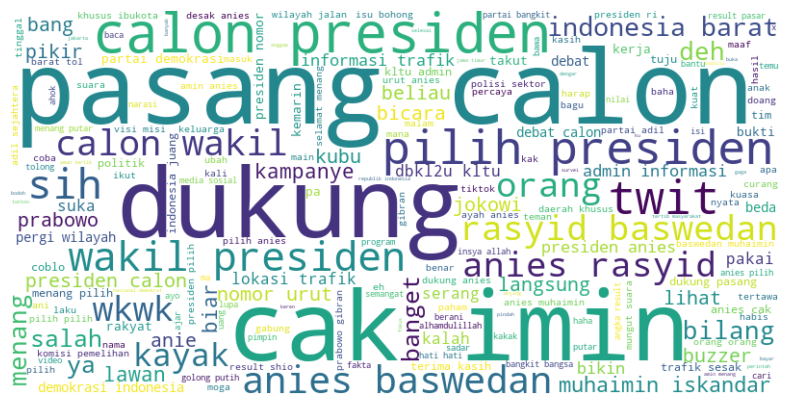

In [95]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words_no_stopwords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hilangkan axis
plt.show()

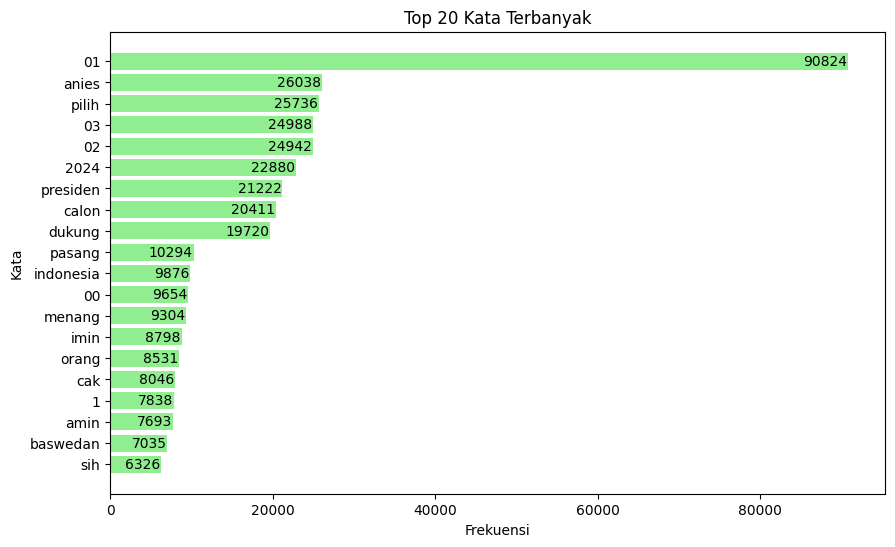

In [96]:
from collections import Counter

# Pecah string panjang menjadi list of words (tokenisasi)
token_list = all_words_no_stopwords.split()

# Hitung frekuensi kata menggunakan Counter
word_counts = Counter(token_list)

# Ambil 20 kata yang paling sering muncul
most_common_words = word_counts.most_common(20)

# Pisahkan kata dan frekuensinya untuk plotting
words, frequencies = zip(*most_common_words)

# Plot Bar Chart untuk kata-kata paling sering
plt.figure(figsize=(10, 6))
bars = plt.barh(words, frequencies, color='lightgreen')

# Menambahkan label frekuensi di dalam batang
for bar, frequency in zip(bars, frequencies):
    plt.text(bar.get_width() - 100,  # Mengatur agar teks berada sedikit di dalam batang
             bar.get_y() + bar.get_height() / 2,  # Posisi vertikal
             f'{frequency}',  # Nilai frekuensi yang akan ditampilkan
             va='center', ha='right', color='black', fontsize=10)  # Posisi dan gaya teks

# Label sumbu
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Top 20 Kata Terbanyak')

# Membalik sumbu y agar kata dengan frekuensi tertinggi di atas
plt.gca().invert_yaxis()

# Tampilkan plot
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_10524\3996526616.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=tweets_per_month.index.astype(str), y=tweets_per_month.values, palette="Blues_r")


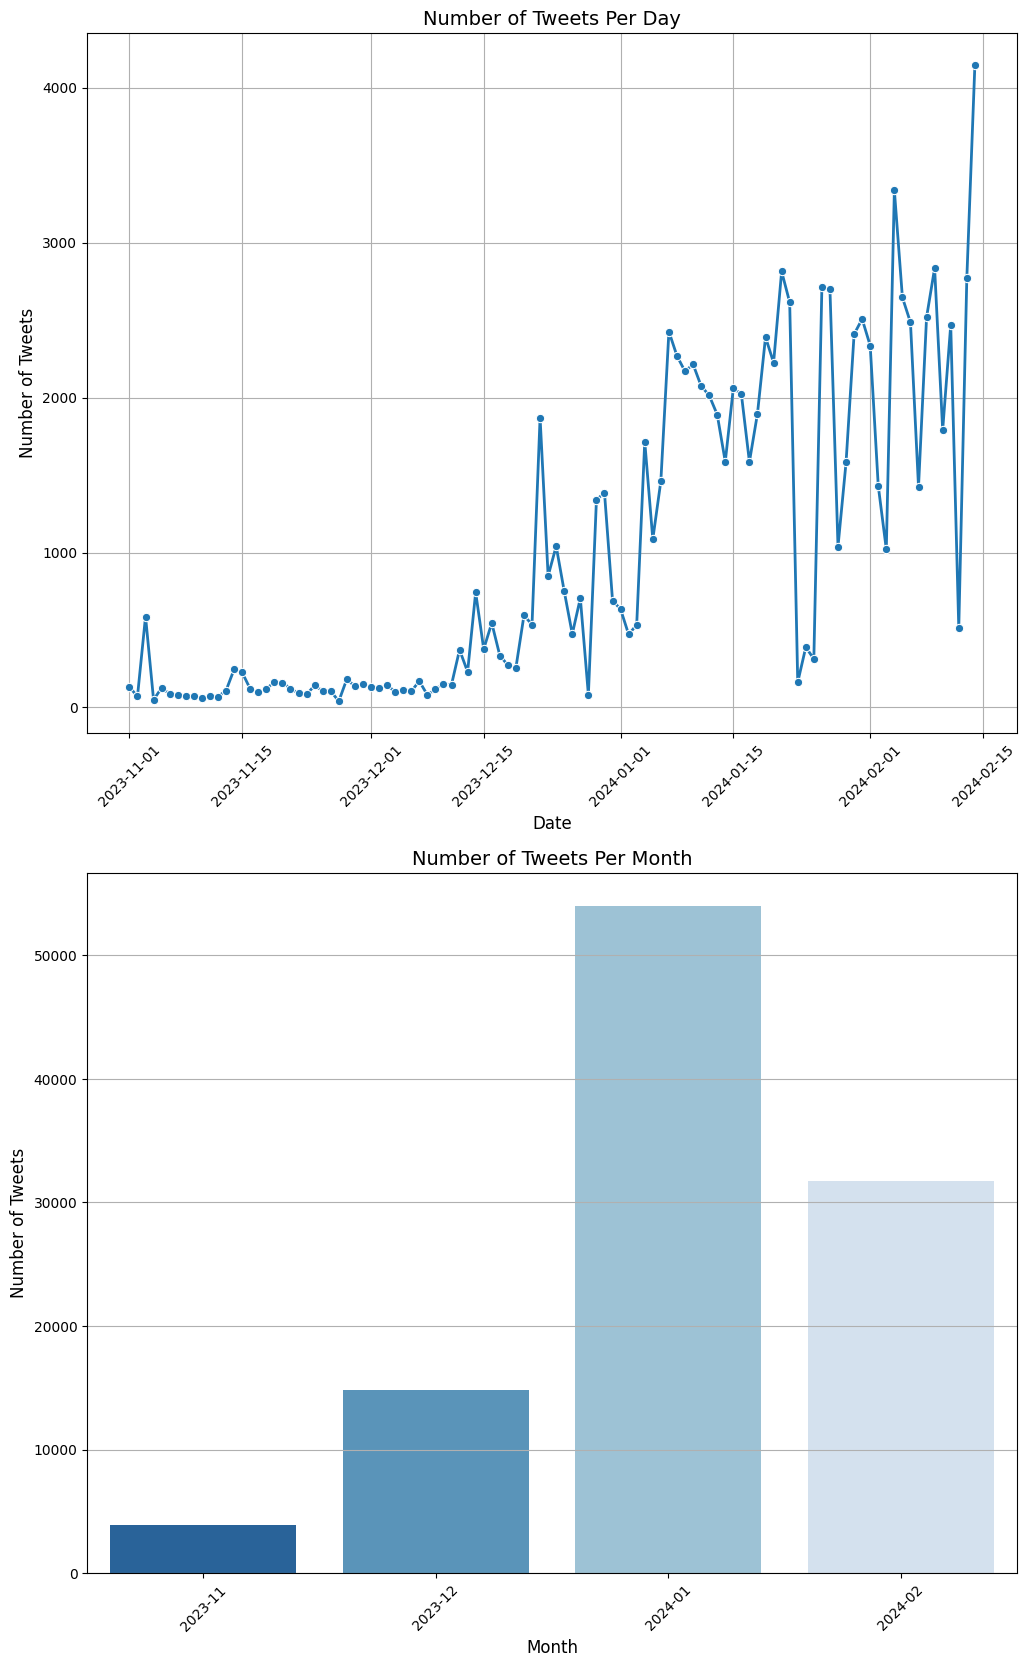

In [97]:
import seaborn as sns

merged_kubu_01['created_at'] = pd.to_datetime(merged_kubu_01['created_at'])
tweets_per_day = merged_kubu_01.groupby(merged_kubu_01['created_at'].dt.date).size()
tweets_per_month = merged_kubu_01.groupby(merged_kubu_01['created_at'].dt.to_period('M')).size()

fig, axes = plt.subplots(2, 1, figsize=(12, 20))

# Per Day
sns.lineplot(ax=axes[0], x=tweets_per_day.index, y=tweets_per_day.values, marker='o', linewidth=2)
axes[0].set_title('Number of Tweets Per Day', fontsize=14)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Number of Tweets', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Per Month
sns.barplot(ax=axes[1], x=tweets_per_month.index.astype(str), y=tweets_per_month.values, palette="Blues_r")
axes[1].set_title('Number of Tweets Per Month', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Number of Tweets', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

### Party 02

In [98]:
merged_kubu_02.dropna(subset=['full_text'], inplace=True)
token_data = [row.split() for row in merged_kubu_02['full_text']]
all_words_no_stopwords = ' '.join([' '.join(tokens) for tokens in token_data])

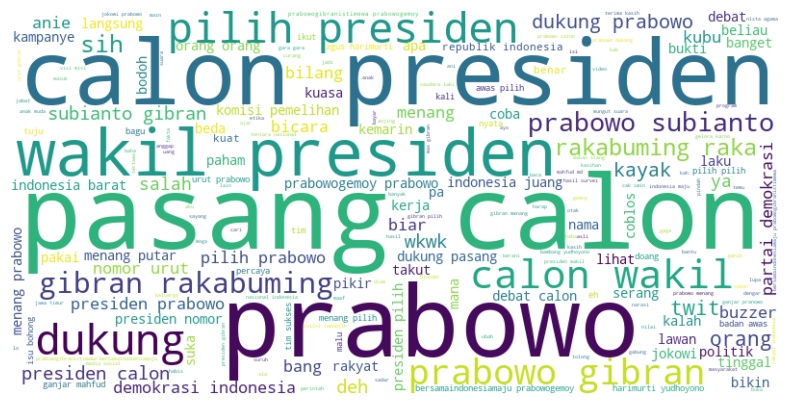

In [99]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words_no_stopwords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hilangkan axis
plt.show()

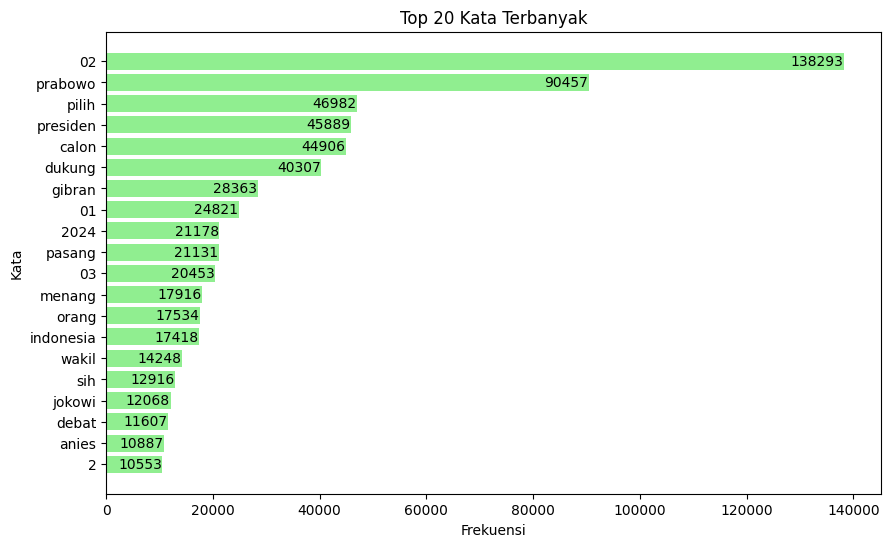

In [100]:
# Pecah string panjang menjadi list of words (tokenisasi)
token_list = all_words_no_stopwords.split()

# Hitung frekuensi kata menggunakan Counter
word_counts = Counter(token_list)

# Ambil 20 kata yang paling sering muncul
most_common_words = word_counts.most_common(20)

# Pisahkan kata dan frekuensinya untuk plotting
words, frequencies = zip(*most_common_words)

# Plot Bar Chart untuk kata-kata paling sering
plt.figure(figsize=(10, 6))
bars = plt.barh(words, frequencies, color='lightgreen')

# Menambahkan label frekuensi di dalam batang
for bar, frequency in zip(bars, frequencies):
    plt.text(bar.get_width() - 100,  # Mengatur agar teks berada sedikit di dalam batang
             bar.get_y() + bar.get_height() / 2,  # Posisi vertikal
             f'{frequency}',  # Nilai frekuensi yang akan ditampilkan
             va='center', ha='right', color='black', fontsize=10)  # Posisi dan gaya teks

# Label sumbu
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Top 20 Kata Terbanyak')

# Membalik sumbu y agar kata dengan frekuensi tertinggi di atas
plt.gca().invert_yaxis()

# Tampilkan plot
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_10524\2509577958.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=tweets_per_month.index.astype(str), y=tweets_per_month.values, palette="Blues_r")


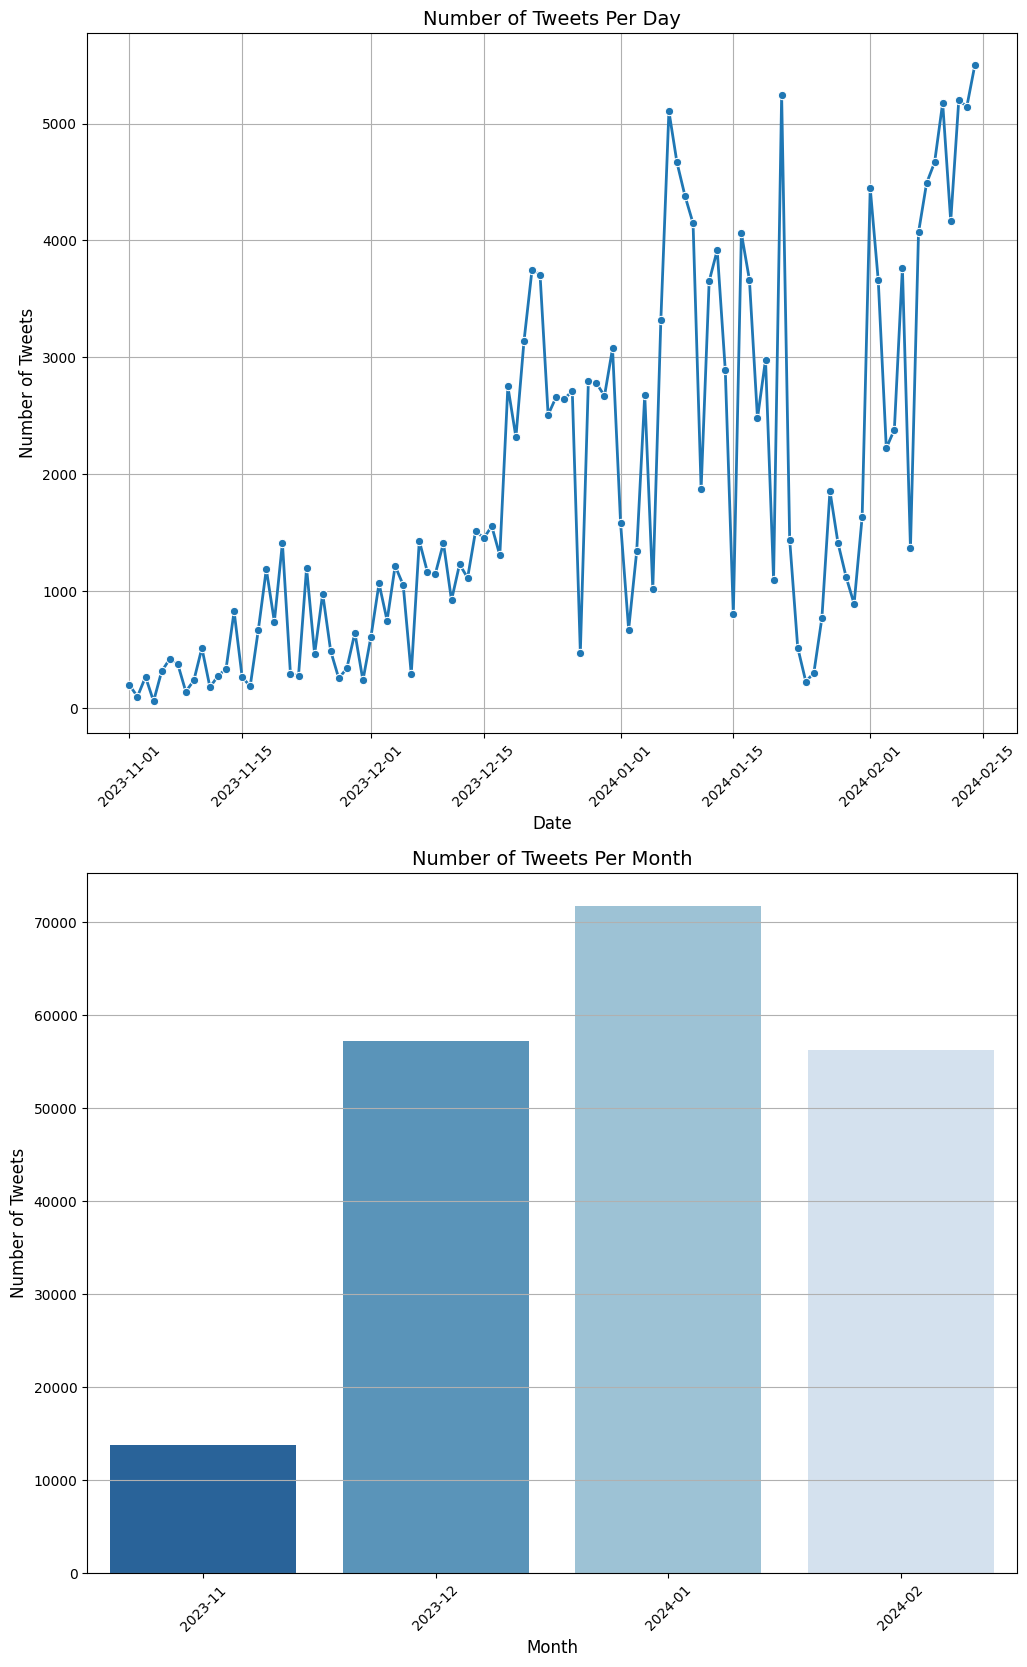

In [101]:
merged_kubu_02['created_at'] = pd.to_datetime(merged_kubu_02['created_at'])
tweets_per_day = merged_kubu_02.groupby(merged_kubu_02['created_at'].dt.date).size()
tweets_per_month = merged_kubu_02.groupby(merged_kubu_02['created_at'].dt.to_period('M')).size()

fig, axes = plt.subplots(2, 1, figsize=(12, 20))

# Per Day
sns.lineplot(ax=axes[0], x=tweets_per_day.index, y=tweets_per_day.values, marker='o', linewidth=2)
axes[0].set_title('Number of Tweets Per Day', fontsize=14)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Number of Tweets', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Per Month
sns.barplot(ax=axes[1], x=tweets_per_month.index.astype(str), y=tweets_per_month.values, palette="Blues_r")
axes[1].set_title('Number of Tweets Per Month', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Number of Tweets', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

### Party 03

In [102]:
merged_kubu_03.dropna(subset=['full_text'], inplace=True)
token_data = [row.split() for row in merged_kubu_03['full_text']]
all_words_no_stopwords = ' '.join([' '.join(tokens) for tokens in token_data])

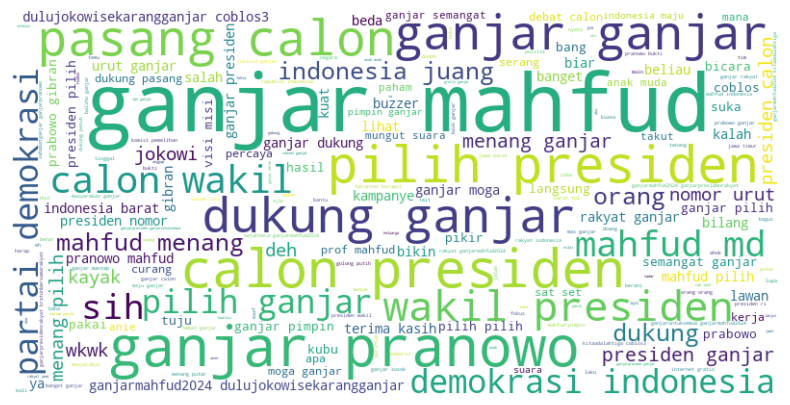

In [103]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words_no_stopwords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hilangkan axis
plt.show()

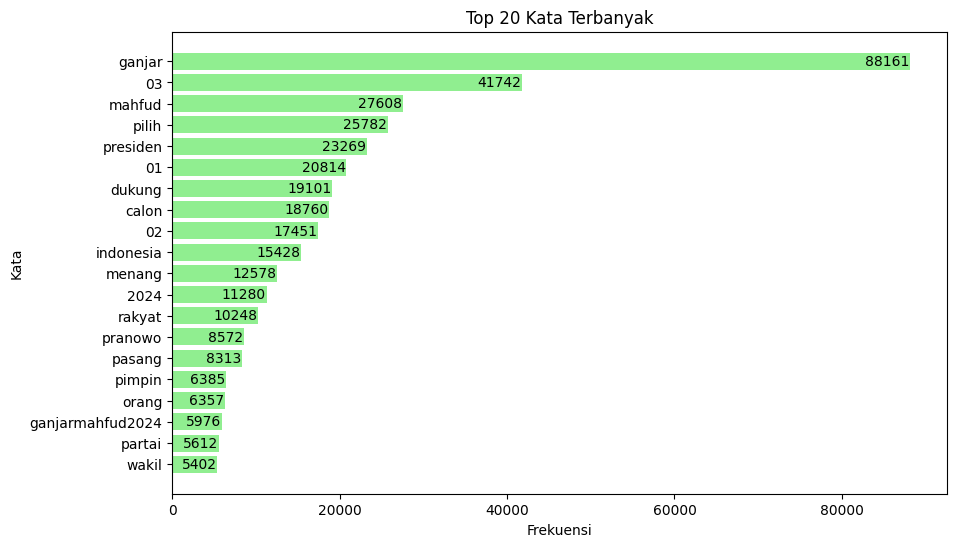

In [104]:
# Pecah string panjang menjadi list of words (tokenisasi)
token_list = all_words_no_stopwords.split()

# Hitung frekuensi kata menggunakan Counter
word_counts = Counter(token_list)

# Ambil 20 kata yang paling sering muncul
most_common_words = word_counts.most_common(20)

# Pisahkan kata dan frekuensinya untuk plotting
words, frequencies = zip(*most_common_words)

# Plot Bar Chart untuk kata-kata paling sering
plt.figure(figsize=(10, 6))
bars = plt.barh(words, frequencies, color='lightgreen')

# Menambahkan label frekuensi di dalam batang
for bar, frequency in zip(bars, frequencies):
    plt.text(bar.get_width() - 100,  # Mengatur agar teks berada sedikit di dalam batang
             bar.get_y() + bar.get_height() / 2,  # Posisi vertikal
             f'{frequency}',  # Nilai frekuensi yang akan ditampilkan
             va='center', ha='right', color='black', fontsize=10)  # Posisi dan gaya teks

# Label sumbu
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Top 20 Kata Terbanyak')

# Membalik sumbu y agar kata dengan frekuensi tertinggi di atas
plt.gca().invert_yaxis()

# Tampilkan plot
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_10524\2217318453.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=tweets_per_month.index.astype(str), y=tweets_per_month.values, palette="Blues_r")


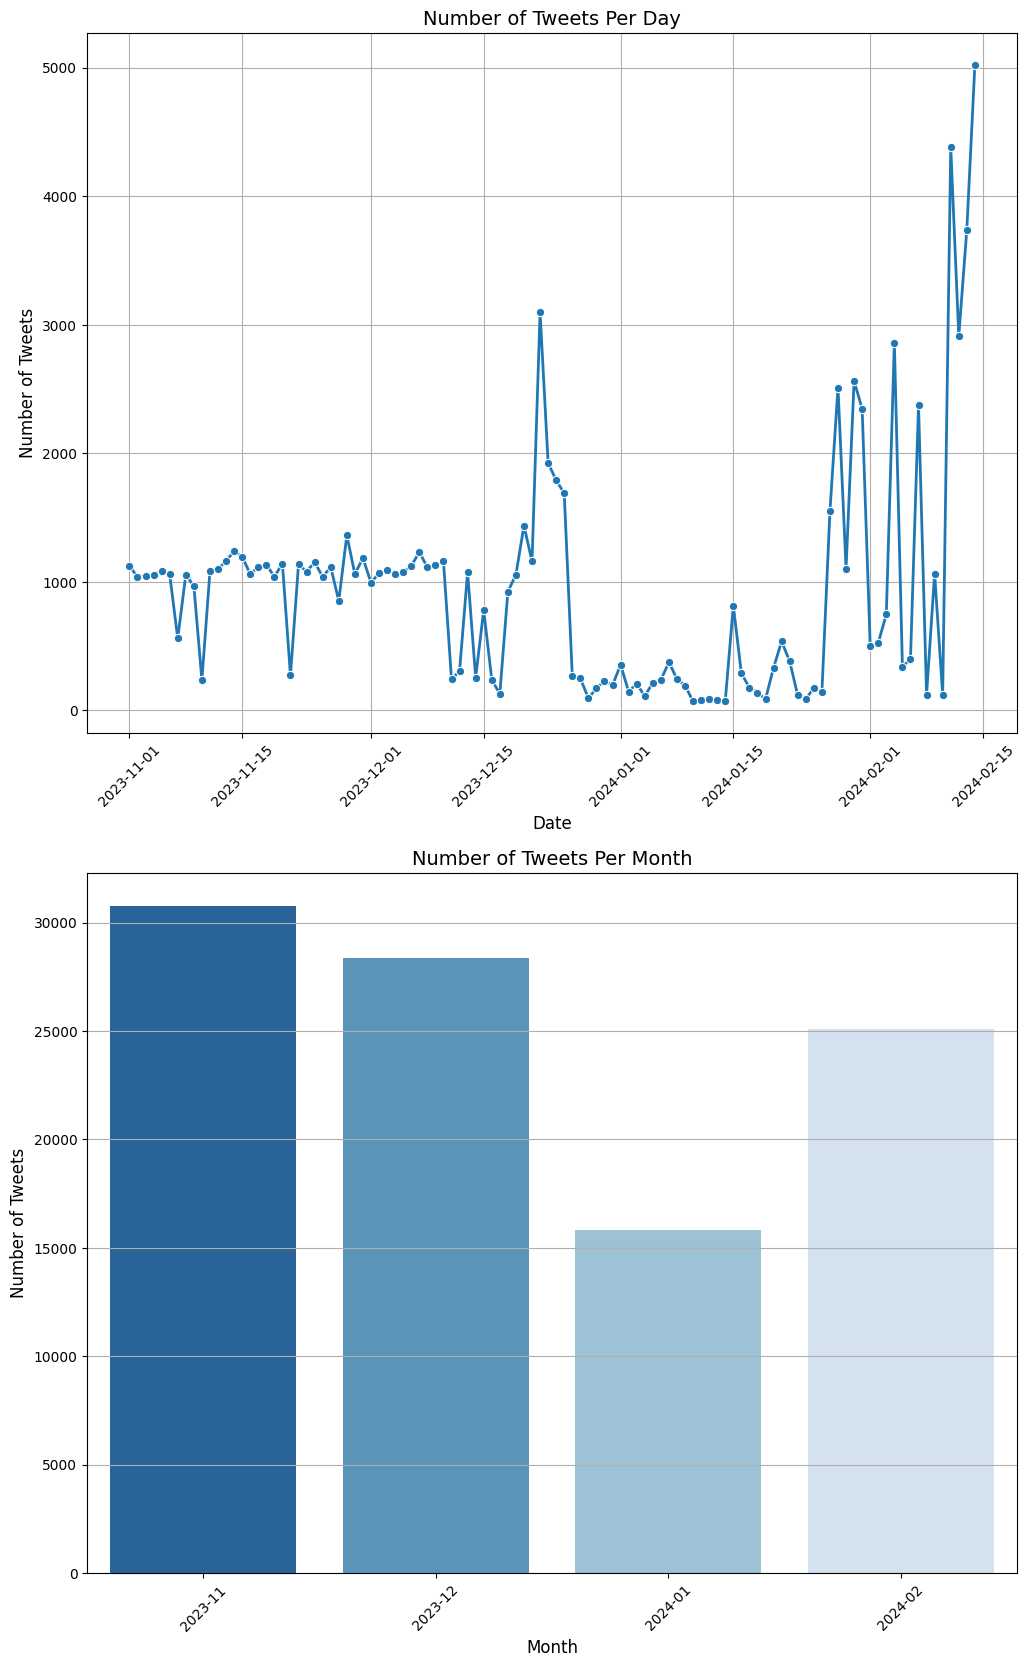

In [105]:
merged_kubu_03['created_at'] = pd.to_datetime(merged_kubu_03['created_at'])
tweets_per_day = merged_kubu_03.groupby(merged_kubu_03['created_at'].dt.date).size()
tweets_per_month = merged_kubu_03.groupby(merged_kubu_03['created_at'].dt.to_period('M')).size()

fig, axes = plt.subplots(2, 1, figsize=(12, 20))

# Per Day
sns.lineplot(ax=axes[0], x=tweets_per_day.index, y=tweets_per_day.values, marker='o', linewidth=2)
axes[0].set_title('Number of Tweets Per Day', fontsize=14)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Number of Tweets', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Per Month
sns.barplot(ax=axes[1], x=tweets_per_month.index.astype(str), y=tweets_per_month.values, palette="Blues_r")
axes[1].set_title('Number of Tweets Per Month', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Number of Tweets', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')